In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
lowContrastImage = cv2.imread('images/aaa.jpg')
print('lowContrastImage.dtype is %s ' % (lowContrastImage.dtype))
print('lowContrastImage.shape ',lowContrastImage.shape)
height = lowContrastImage.shape[0]
lowContrastImage = cv2.cvtColor(lowContrastImage, cv2.COLOR_BGR2RGB)
#显示图像
# plt.subplot(2, 2, 1)
# plt.imshow(lowContrastImage)
# plt.title("low contrast image")

# plt.subplot(2, 2, 2)

r,g,b=cv2.split(lowContrastImage)
# print('r',r)
# print('g',g)
# print('b',b)
ar = np.array(r).flatten() 
# print(type(ar))
# plt.hist(ar,bins = 256, density = 1, facecolor = 'red', edgecolor = 'red')
ag = np.array(g).flatten() 
# plt.hist(ag,bins = 256, density = 1, facecolor = 'green', edgecolor = 'green') 
ab = np.array(b).flatten() 
# plt.hist(ab,bins = 256, density = 1, facecolor = 'blue', edgecolor = 'blue') 
# plt.title("low contrast histogram")
# plt.show()



lowContrastImage.dtype is uint8 
lowContrastImage.shape  (1440, 1080, 3)


In [3]:
def countOriginalProbability(array):
    dict  = {}
    arrLength = len(array)
    for a in array:
        dict[a] = dict.get(a,0) + 1
    for p in dict :
        dict[p] = dict.get(p) / arrLength
    list = sorted(dict.items(), key=lambda d: d[0])
#     listLength = len(list)
#     sumProb = 0
#     for i in range(listLength):
#         sumProb += list[i][1] 
#         dict[list[i][0]] = sumProb
#     for i in range(listLength):
#         dict[list[i][0]] = list[i][1]
    return list

In [4]:
arList = countOriginalProbability(ar)
print(arList)
agList = countOriginalProbability(ag)
abList = countOriginalProbability(ab)


[(0, 5.1440329218107e-06), (1, 6.430041152263375e-07), (3, 4.501028806584362e-06), (4, 1.1574074074074073e-05), (5, 1.54320987654321e-05), (6, 2.7006172839506174e-05), (7, 3.022119341563786e-05), (8, 3.536522633744856e-05), (9, 6.17283950617284e-05), (10, 8.680555555555556e-05), (11, 0.00012088477366255144), (12, 0.00013631687242798355), (13, 0.00018325617283950618), (14, 0.0002662037037037037), (15, 0.0003362911522633745), (16, 0.0004533179012345679), (17, 0.0005954218106995885), (18, 0.0006860853909465021), (19, 0.0008442644032921811), (20, 0.0010165895061728396), (21, 0.0011940586419753086), (22, 0.0011934156378600822), (23, 0.001511059670781893), (24, 0.0013728137860082304), (25, 0.0015837191358024692), (26, 0.001449974279835391), (27, 0.0014152520576131687), (28, 0.0016377314814814815), (29, 0.001990097736625514), (30, 0.00225244341563786), (31, 0.0028337191358024693), (32, 0.002850437242798354), (33, 0.0025585133744855967), (34, 0.0022472993827160493), (35, 0.0018377057613168724)

In [5]:
def countAccumulatedProbability(list):
    listLength = len(list)
    sumProb = 0
    dict={}
    for i in range(listLength):
        sumProb += list[i][1]
        dict[list[i][0]] = sumProb
    return dict

In [6]:
countarDict = countAccumulatedProbability(arList)
print(countarDict)
countagDict = countAccumulatedProbability(agList)
countabDict = countAccumulatedProbability(abList)

{0: 5.1440329218107e-06, 1: 5.787037037037038e-06, 3: 1.02880658436214e-05, 4: 2.1862139917695473e-05, 5: 3.729423868312757e-05, 6: 6.430041152263375e-05, 7: 9.45216049382716e-05, 8: 0.00012988683127572017, 9: 0.00019161522633744858, 10: 0.00027842078189300415, 11: 0.0003993055555555556, 12: 0.0005356224279835392, 13: 0.0007188786008230453, 14: 0.000985082304526749, 15: 0.0013213734567901236, 16: 0.0017746913580246914, 17: 0.00237011316872428, 18: 0.003056198559670782, 19: 0.003900462962962963, 20: 0.004917052469135803, 21: 0.006111111111111111, 22: 0.007304526748971194, 23: 0.008815586419753087, 24: 0.010188400205761318, 25: 0.011772119341563787, 26: 0.013222093621399178, 27: 0.014637345679012346, 28: 0.01627507716049383, 29: 0.018265174897119343, 30: 0.020517618312757203, 31: 0.023351337448559672, 32: 0.026201774691358027, 33: 0.028760288065843624, 34: 0.03100758744855967, 35: 0.032845293209876544, 36: 0.03420138888888889, 37: 0.035248842592592596, 38: 0.0362377829218107, 39: 0.03713

In [7]:
def floorExtend(dict,L):
    for i in dict:
        dict[i] = int( (L - 1) * dict.get(i) + 0.5)
    return dict

In [8]:
reflectedRDict = floorExtend(countarDict,256)

reflectedGDict = floorExtend(countagDict,256)
reflectedBDict = floorExtend(countabDict,256)

print(reflectedRDict)
print(reflectedGDict)
print(reflectedBDict)

{0: 0, 1: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 1, 18: 1, 19: 1, 20: 1, 21: 2, 22: 2, 23: 2, 24: 3, 25: 3, 26: 3, 27: 4, 28: 4, 29: 5, 30: 5, 31: 6, 32: 7, 33: 7, 34: 8, 35: 8, 36: 9, 37: 9, 38: 9, 39: 9, 40: 10, 41: 10, 42: 10, 43: 10, 44: 10, 45: 11, 46: 11, 47: 11, 48: 11, 49: 11, 50: 11, 51: 12, 52: 12, 53: 12, 54: 12, 55: 12, 56: 13, 57: 13, 58: 13, 59: 14, 60: 14, 61: 15, 62: 15, 63: 15, 64: 16, 65: 17, 66: 17, 67: 17, 68: 18, 69: 18, 70: 19, 71: 19, 72: 20, 73: 20, 74: 21, 75: 22, 76: 22, 77: 23, 78: 23, 79: 23, 80: 24, 81: 24, 82: 24, 83: 25, 84: 25, 85: 25, 86: 26, 87: 26, 88: 27, 89: 27, 90: 28, 91: 28, 92: 29, 93: 30, 94: 30, 95: 31, 96: 32, 97: 33, 98: 34, 99: 35, 100: 37, 101: 38, 102: 39, 103: 40, 104: 41, 105: 42, 106: 43, 107: 44, 108: 45, 109: 46, 110: 47, 111: 47, 112: 48, 113: 50, 114: 51, 115: 52, 116: 53, 117: 54, 118: 55, 119: 56, 120: 57, 121: 58, 122: 59, 123: 60, 124: 61, 125: 62, 126: 63, 127: 64, 128

In [9]:
def getEquilibriumArray(array,reflectedDict):
    arrLength = len(array)
    newArray = []#np.zeros((arrLength))
    for i in range(arrLength):
        #print(reflectDict.get(array[i]))
        newArray.append(reflectedDict.get(array[i]))
    return newArray

In [10]:
reflectedRArray = getEquilibriumArray(ar,reflectedRDict)
reflectedGArray = getEquilibriumArray(ag,reflectedGDict)
reflectedBArray = getEquilibriumArray(ab,reflectedBDict)


In [11]:
reflectedRArray2 = np.reshape(reflectedRArray, (height,-1))
reflectedGArray2 = np.reshape(reflectedGArray, (height,-1))
reflectedBArray2 = np.reshape(reflectedBArray, (height,-1))

(1440, 1080)
(1440, 1080)


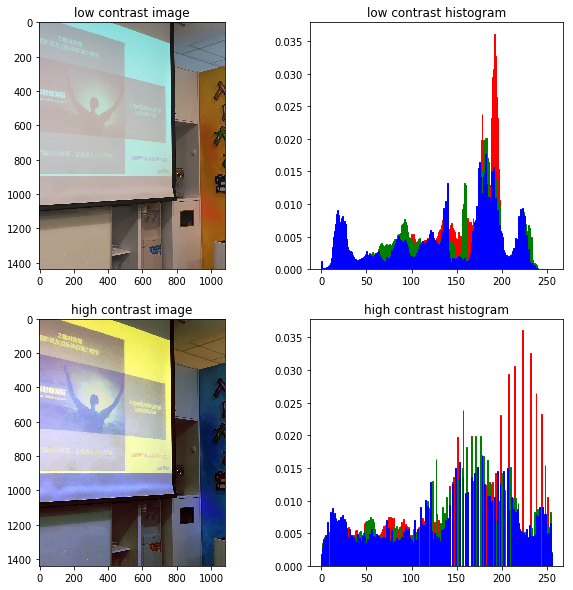

In [12]:
# print(reflectedRArray)
# print(reflectedGArray)
# print(reflectedBArray)

src = cv2.merge([reflectedBArray2,reflectedGArray2,reflectedRArray2])
# src = cv2.merge([b,g,r])
print(r.shape)
print(reflectedRArray2.shape)

plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.imshow(lowContrastImage)
plt.title("low contrast image")

plt.subplot(2, 2, 2)
plt.hist(ar,bins = 256, density = 1, facecolor = 'red', edgecolor = 'red')
ag = np.array(g).flatten() 
plt.hist(ag,bins = 256, density = 1, facecolor = 'green', edgecolor = 'green') 
ab = np.array(b).flatten() 
plt.hist(ab,bins = 256, density = 1, facecolor = 'blue', edgecolor = 'blue') 
plt.title("low contrast histogram")

plt.subplot(2, 2, 3)
plt.imshow(src)
plt.title("high contrast image")

plt.subplot(2, 2, 4)
plt.hist(reflectedRArray,bins = 256, density = 1, facecolor = 'red', edgecolor = 'red')
plt.hist(reflectedGArray,bins = 256, density = 1, facecolor = 'green', edgecolor = 'green') 
plt.hist(reflectedBArray,bins = 256, density = 1, facecolor = 'blue', edgecolor = 'blue') 
plt.title("high contrast histogram")
plt.show()